# College Major Earnings Analysis
We'll use matplotlib and pandas to do some basic exploration and visualization of a college major dataset.

## Dataset
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo [here](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size (unweighted) of full-time.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Median** - Median salary of full-time, year-round workers.
- **Low_wage_jobs** - Number in low-wage service jobs.
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 35 hours.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Data Cleaning

In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
recent_grads.isnull().values.sum()

4

There are only 4 rows with null values, so dropping them won't have much of an effect on the data.

In [5]:
recent_grads.dropna(inplace=True)

## Exploration 

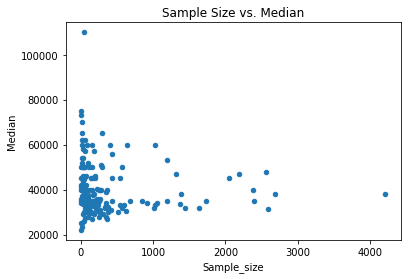

In [6]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs. Median')

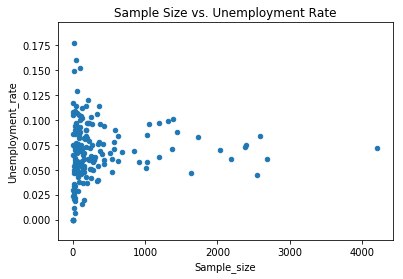

In [7]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs. Unemployment Rate')

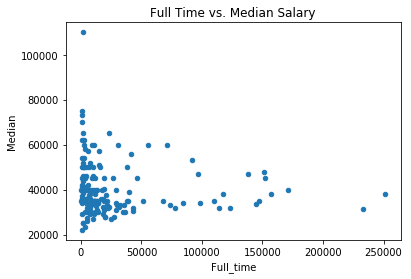

In [8]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs. Median Salary')

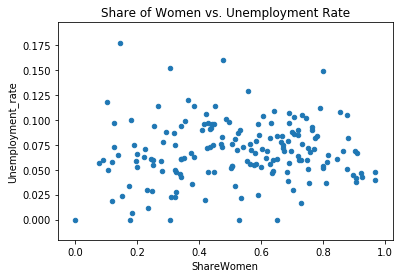

In [9]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share of Women vs. Unemployment Rate')

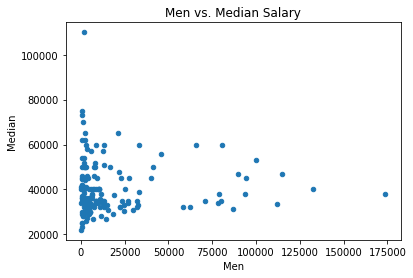

In [10]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median Salary')

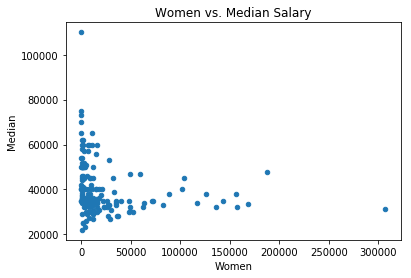

In [11]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median Salary')

From looking at these charts it looks like students in more popular majors tend to make less money as recent grads. Additionally, students that majored in subjects that were majority female made less money on average, and majors with less full time employees made more money on average.

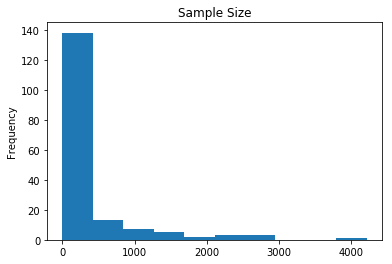

In [12]:
recent_grads['Sample_size'].plot(kind='hist', title='Sample Size')

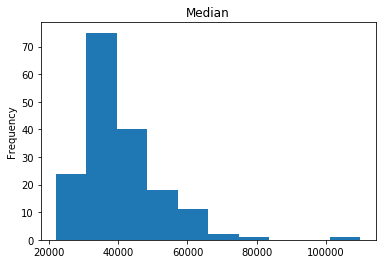

In [13]:
recent_grads['Median'].plot(kind='hist', title='Median')

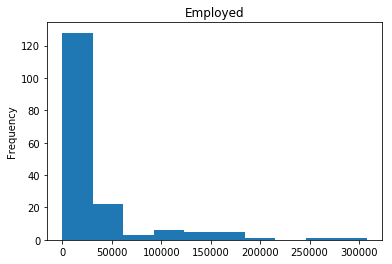

In [14]:
recent_grads['Employed'].plot(kind='hist', title='Employed')

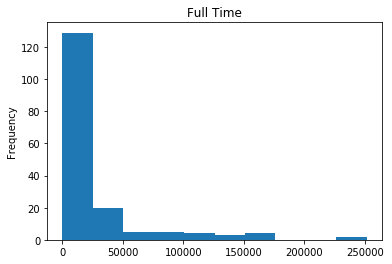

In [15]:
recent_grads['Full_time'].plot(kind='hist', title='Full Time')

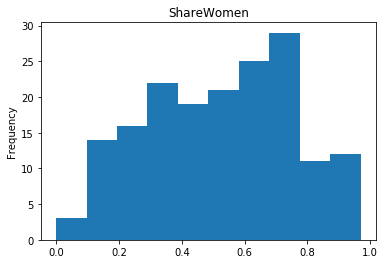

In [16]:
recent_grads['ShareWomen'].plot(kind='hist', title='ShareWomen')

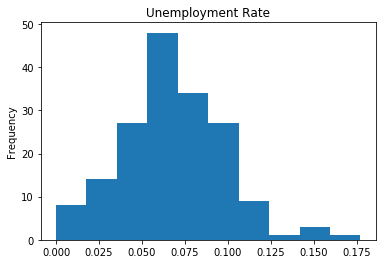

In [17]:
recent_grads['Unemployment_rate'].plot(kind='hist', title='Unemployment Rate')

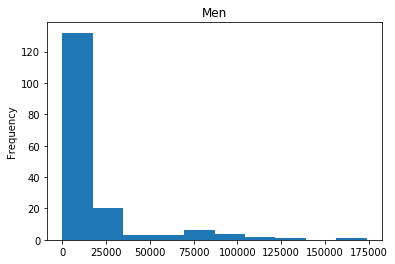

In [18]:
recent_grads['Men'].plot(kind='hist', title='Men')

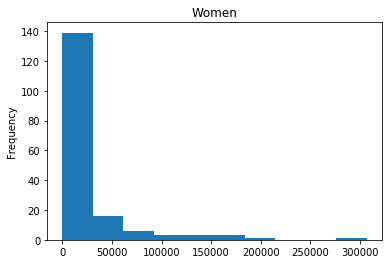

In [19]:
recent_grads['Women'].plot(kind='hist', title='Women')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f2dd14e0>,
      dtype=object)

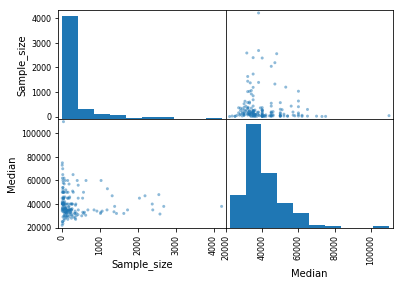

In [20]:
scatter_matrix(recent_grads[['Sample_size', 'Median']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7f2ce66d8>,
      dtype=object)

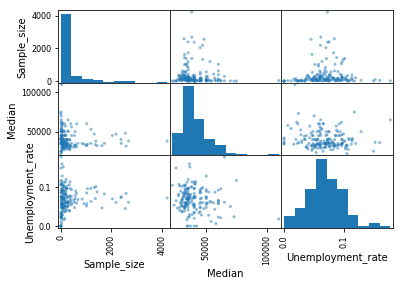

In [21]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']])

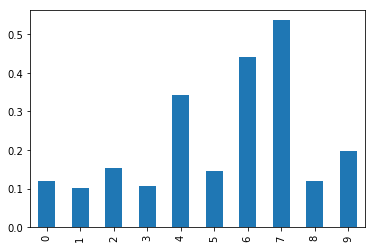

In [22]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

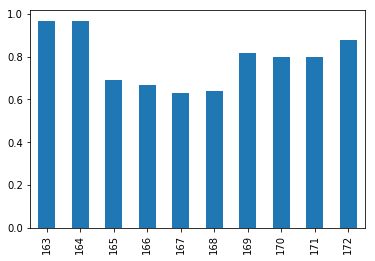

In [23]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar')